# Predict the tips you will receive by gender, number of guests, total amount eaten, etc.

In [1]:
import seaborn as sns
#- ! bs4 모듈이 설치되어 있어야 합니다. -#

sns.get_dataset_names()

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [2]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
import pandas as pd
# 카테고리형 데이터 더미변수로 변경
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [5]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [6]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [9]:
W = np.random.rand(12)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [17409.68436724  2086.22389493   500.62813889   243.03480839
   293.13880142   450.52414587   169.7899376     51.39445336
   272.7084367    249.77011963   181.84155981   561.82138748]
db: 36.57358757136956


Iteration 10 : Loss 1.4781
Iteration 20 : Loss 1.4497
Iteration 30 : Loss 1.4388
Iteration 40 : Loss 1.4286
Iteration 50 : Loss 1.4189
Iteration 60 : Loss 1.4097
Iteration 70 : Loss 1.4010
Iteration 80 : Loss 1.3927
Iteration 90 : Loss 1.3849
Iteration 100 : Loss 1.3774
Iteration 110 : Loss 1.3704
Iteration 120 : Loss 1.3637
Iteration 130 : Loss 1.3573
Iteration 140 : Loss 1.3512
Iteration 150 : Loss 1.3454
Iteration 160 : Loss 1.3399
Iteration 170 : Loss 1.3346
Iteration 180 : Loss 1.3295
Iteration 190 : Loss 1.3247
Iteration 200 : Loss 1.3201
Iteration 210 : Loss 1.3157
Iteration 220 : Loss 1.3115
Iteration 230 : Loss 1.3074
Iteration 240 : Loss 1.3035
Iteration 250 : Loss 1.2998
Iteration 260 : Loss 1.2962
Iteration 270 : Loss 1.2927
Iteration 280 : Loss 1.2894
Iteration 290 : Loss 1.2862
Iteration 300 : Loss 1.2831
Iteration 310 : Loss 1.2801
Iteration 320 : Loss 1.2772
Iteration 330 : Loss 1.2744
Iteration 340 : Loss 1.2717
Iteration 350 : Loss 1.2691
Iteration 360 : Loss 1.2666
I

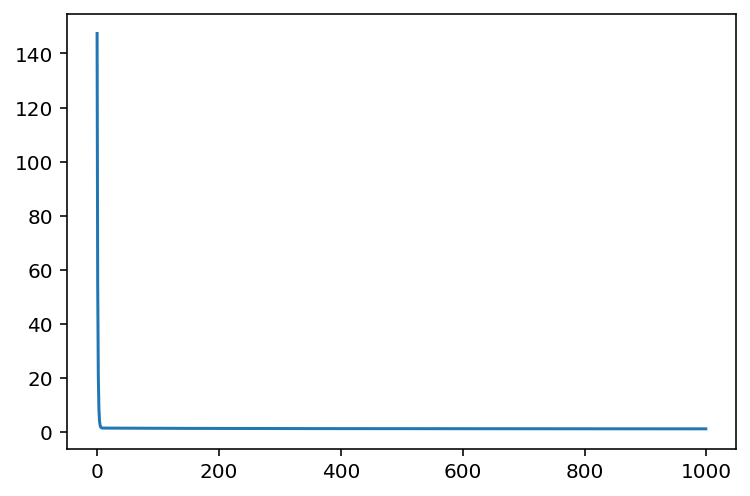

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
LEARNING_RATE = 0.0001
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
plt.plot(losses)
plt.show()

In [11]:
W, b

(array([ 0.08867891,  0.00931229, -0.03900374, -0.07704375, -0.0184248 ,
         0.24442595,  0.1021067 ,  0.82682943,  0.49549509,  0.65197802,
         0.22331156, -0.19537099]),
 0.8611965055802179)

In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.67647307522244

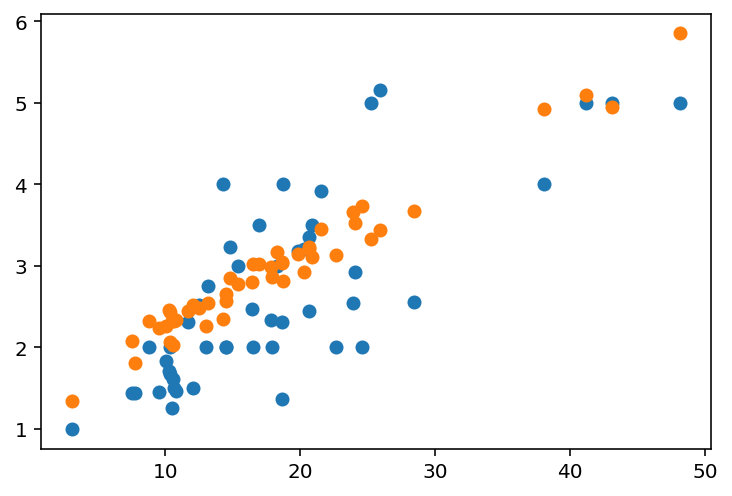

In [13]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## Using Scikit-learn

In [18]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print(X,type(X),y,type(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

[[16.99  2.    0.   ...  1.    0.    1.  ]
 [10.34  3.    1.   ...  1.    0.    1.  ]
 [21.01  3.    1.   ...  1.    0.    1.  ]
 ...
 [22.67  2.    1.   ...  0.    0.    1.  ]
 [17.82  2.    1.   ...  0.    0.    1.  ]
 [18.78  2.    0.   ...  0.    0.    1.  ]] <class 'numpy.ndarray'> [ 1.01  1.66  3.5   3.31  3.61  4.71  2.    3.12  1.96  3.23  1.71  5.
  1.57  3.    3.02  3.92  1.67  3.71  3.5   3.35  4.08  2.75  2.23  7.58
  3.18  2.34  2.    2.    4.3   3.    1.45  2.5   3.    2.45  3.27  3.6
  2.    3.07  2.31  5.    2.24  2.54  3.06  1.32  5.6   3.    5.    6.
  2.05  3.    2.5   2.6   5.2   1.56  4.34  3.51  3.    1.5   1.76  6.73
  3.21  2.    1.98  3.76  2.64  3.15  2.47  1.    2.01  2.09  1.97  3.
  3.14  5.    2.2   1.25  3.08  4.    3.    2.71  3.    3.4   1.83  5.
  2.03  5.17  2.    4.    5.85  3.    3.    3.5   1.    4.3   3.25  4.73
  4.    1.5   3.    1.5   2.5   3.    2.5   3.48  4.08  1.64  4.06  4.29
  3.76  4.    3.    1.    4.    2.55  4.    3.5   5.07  1.5   1.

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

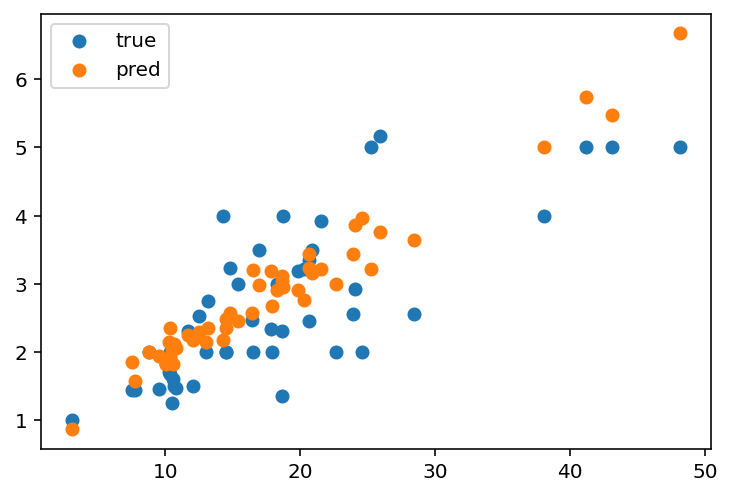

In [17]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()